In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Input: number of samples N
# Output: one-dimensional data set of N points where y_n = sin(2 pi x_n) + epsilon_n as in lecture
def sine_data_set(N):
  np.random.seed(1234)
  x = np.random.uniform(0,1,(N))
  y = np.sin(x*2*np.pi)+np.random.normal(scale=0.2,size=(N))
  return x,y


# Input: instances X as N x M matrix, model theta
# Output: predictions of model theta on X
def predict_regression(X,theta):
  return X @ theta


# Input: one-dimensional inputs x as vector of length N, polynomial degree d 
# Output: polynomial feature representation of the inputs as N x (d+1) matrix 
def poly_features(x,d):
  X = np.zeros((x.shape[0],d+1))
  for i in range(0,d+1):
    X[:,i] = np.power(x,i)
  return X



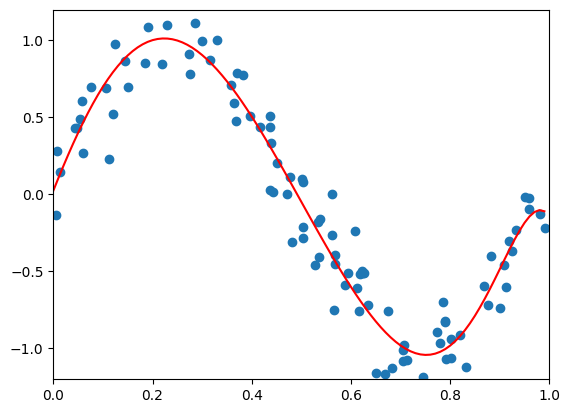

In [17]:
# Generate and plot toy data set
N = 100 #3,10,20,100
x,y = sine_data_set(N)
plt.xlim([0,1])
plt.ylim([-1.2,1.2])
plt.scatter(x,y)

# Polynomial feature representation of degree d
d = 10
X = poly_features(x,d)


sigma = 0.1
sigma_p = 100
M = d + 1

# Compute MAP model
I = np.eye(M)
sigma_sqr = sigma ** -2
sigma_p_sqr = sigma_p ** -2
theta_MAP = sigma_sqr * np.linalg.inv((sigma_sqr * X.T @ X) + (sigma_p_sqr * I)) @ X.T @ y
# Plot MAP model
x_axis = np.arange(0, 1, 0.01)
x_values = poly_features(x_axis, d)
predictions = predict_regression(x_values, theta_MAP)
plt.plot(x_axis, predictions, label="predictions", c='r')
plt.show()



In [18]:
# Compute posterior distribution 
I = np.eye(M)
A = (sigma_sqr * X.T @ X) + (sigma_p_sqr * I)
A_inv = np.linalg.inv(A)
theta_bar = sigma_sqr * A_inv @ X.T @ y
print(f'A is {A} - and theta_bar is {theta_bar}')

A is [[10000.0001      5183.62907879  3452.73380164  2545.0681362
   1995.32757289  1632.80140724  1378.61667748  1191.66060306
   1048.75864724   936.05510082   844.8568212 ]
 [ 5183.62907879  3452.73390164  2545.0681362   1995.32757289
   1632.80140724  1378.61667748  1191.66060306  1048.75864724
    936.05510082   844.8568212    769.48071413]
 [ 3452.73380164  2545.0681362   1995.32767289  1632.80140724
   1378.61667748  1191.66060306  1048.75864724   936.05510082
    844.8568212    769.48071413   706.07603138]
 [ 2545.0681362   1995.32757289  1632.80140724  1378.61677748
   1191.66060306  1048.75864724   936.05510082   844.8568212
    769.48071413   706.07603138   651.95015955]
 [ 1995.32757289  1632.80140724  1378.61667748  1191.66060306
   1048.75874724   936.05510082   844.8568212    769.48071413
    706.07603138   651.95015955   605.16728762]
 [ 1632.80140724  1378.61667748  1191.66060306  1048.75864724
    936.05510082   844.8569212    769.48071413   706.07603138
    651.95015

C:\Users\Amir Hossein\AppData\Local\Temp\ipykernel_19400\2040710156.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(mean=theta_bar, cov=A_inv, size=n_samples)


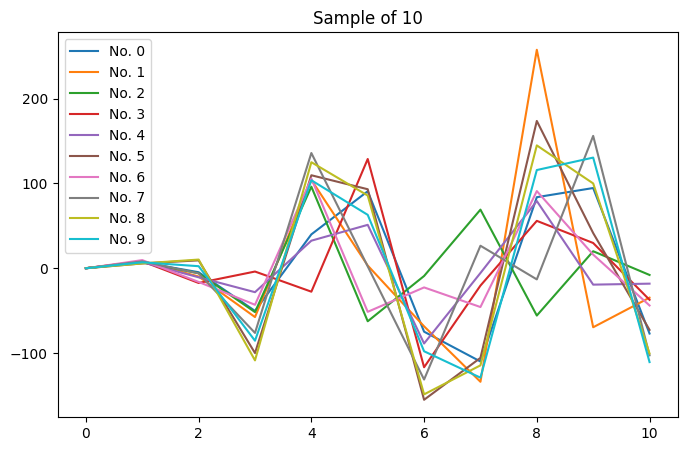

In [22]:
# Draw 10 samples from posterior distribution and plot the corresponding models
n_samples = 10
samples = np.random.multivariate_normal(mean=theta_bar, cov=A_inv, size=n_samples)
plt.figure(figsize=(8,5))
for i in range(n_samples):
    plt.plot(samples[i], label=f"No. {i}")
plt.title(f'Sample of {n_samples}')
plt.legend()
plt.show()

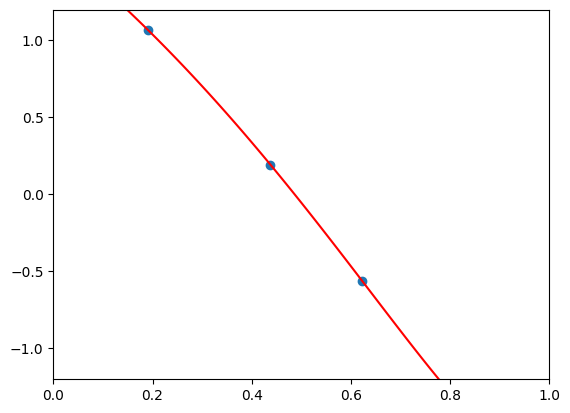

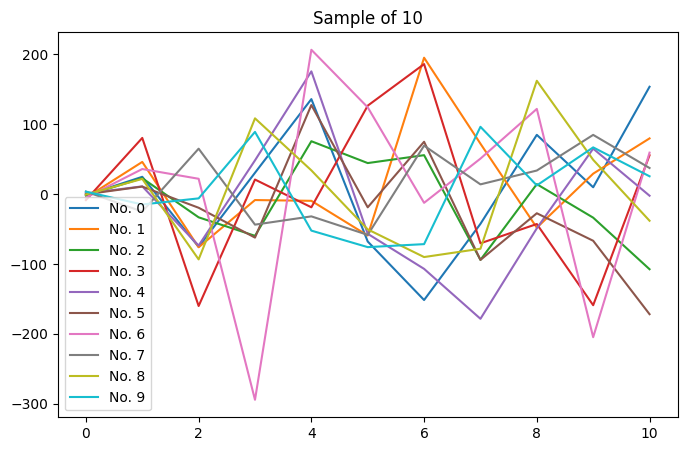

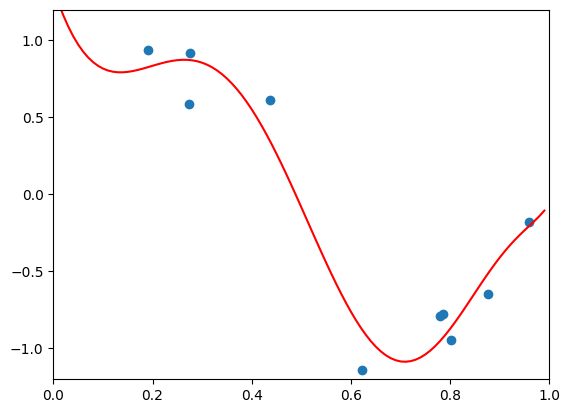

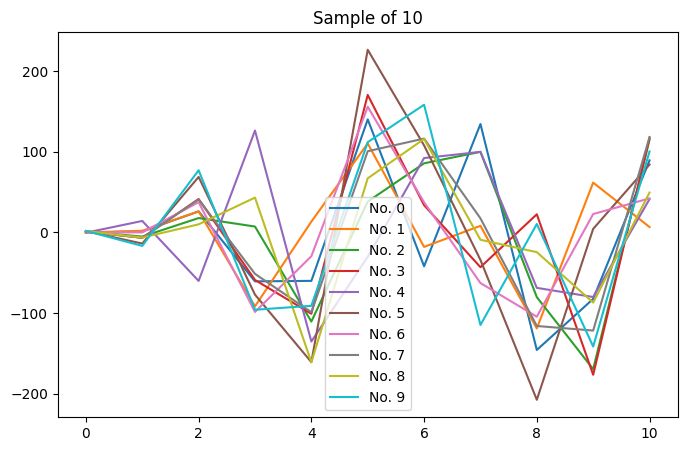

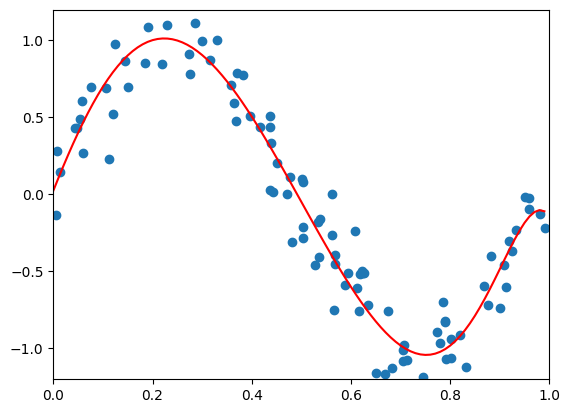

C:\Users\Amir Hossein\AppData\Local\Temp\ipykernel_19400\1959851063.py:30: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(mean=theta_bar, cov=A_inv, size=n_samples)


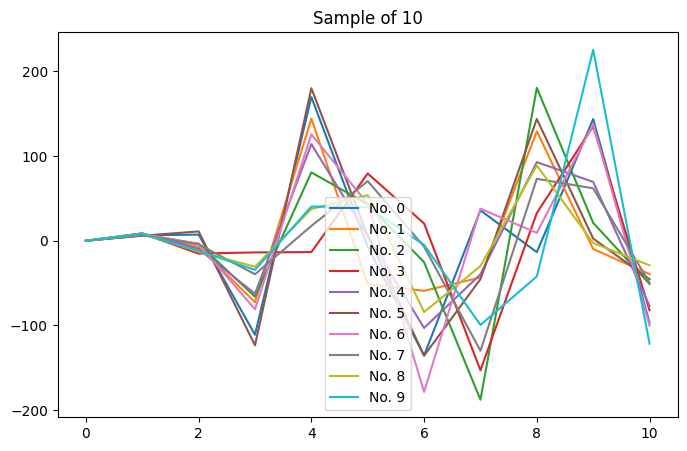

In [24]:
N_array = [3, 10 , 100]
for N in N_array:
    x,y = sine_data_set(N)
    plt.xlim([0,1])
    plt.ylim([-1.2,1.2])
    plt.scatter(x,y)
    d = 10
    X = poly_features(x,d)


    sigma = 0.1
    sigma_p = 100
    M = d + 1

    # Compute MAP model
    I = np.eye(M)
    sigma_sqr = sigma ** -2
    sigma_p_sqr = sigma_p ** -2
    theta_MAP = sigma_sqr * np.linalg.inv((sigma_sqr * X.T @ X) + (sigma_p_sqr * I)) @ X.T @ y
    # Plot MAP model
    x_axis = np.arange(0, 1, 0.01)
    x_values = poly_features(x_axis, d)
    predictions = predict_regression(x_values, theta_MAP)
    plt.plot(x_axis, predictions, label="predictions", c='r')
    plt.show()
    A = (sigma_sqr * X.T @ X) + (sigma_p_sqr * I)
    A_inv = np.linalg.inv(A)
    theta_bar = sigma_sqr * A_inv @ X.T @ y
    n_samples = 10
    samples = np.random.multivariate_normal(mean=theta_bar, cov=A_inv, size=n_samples)
    plt.figure(figsize=(8,5))
    for i in range(n_samples):
        plt.plot(samples[i], label=f"No. {i}")
    plt.title(f'Sample of {n_samples}')
    plt.legend()
    plt.show()